## FGD SORE- KAMIS 10 Maret 2022

In [2]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# membaca dataset
df= pd.read_csv('./file/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.info()
print('-'*50)
dfPanjang=df['class'].value_counts()
print(f'Value Counts: {dfPanjang}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
--------------------------------------------------
Value Counts: Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64


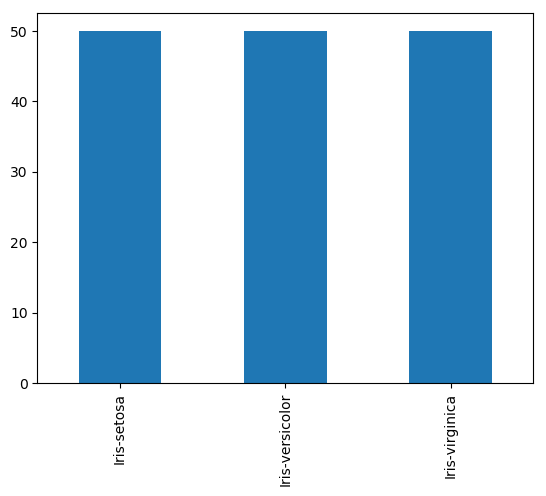

In [17]:
# menampilkan dengan diagram batang
df['class'].value_counts().plot(kind="bar")
plt.show()

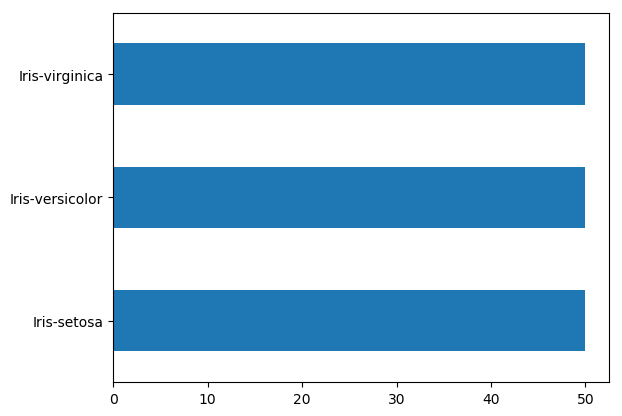

In [18]:
df['class'].value_counts().plot(kind="barh")
plt.show()

## Modeling

In [20]:
# instalasi scikitlearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [21]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [22]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['class']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=41, stratify=y)
y_train.value_counts()

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return floored.astype(np.int)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1609: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use

Iris-virginica     40
Iris-setosa        40
Iris-versicolor    40
Name: class, dtype: int64

In [25]:
y.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [26]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [27]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\acer\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
model.score(X_train, y_train)

0.9583333333333334

In [29]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
pred = model.predict(X_train)
print(classification_report(pred, y_train))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        40
Iris-versicolor       0.90      0.97      0.94        37
 Iris-virginica       0.97      0.91      0.94        43

      micro avg       0.96      0.96      0.96       120
      macro avg       0.96      0.96      0.96       120
   weighted avg       0.96      0.96      0.96       120



In [30]:
confusion_matrix(pred,y_train)

array([[40,  0,  0],
       [ 0, 36,  1],
       [ 0,  4, 39]], dtype=int64)

In [31]:
pred = model.predict(X_test)
print(classification_report(pred, y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.90      0.90      0.90        10
 Iris-virginica       0.90      0.90      0.90        10

      micro avg       0.93      0.93      0.93        30
      macro avg       0.93      0.93      0.93        30
   weighted avg       0.93      0.93      0.93        30



In [32]:
accuracy_score(pred, y_test)

0.9333333333333333